<a href="https://colab.research.google.com/github/pchlenski/aPTR/blob/main/notebooks/sampling_thresholds.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Minimal imports
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import pickle as p

# google colab specific stuff
from google.colab import drive
drive.mount('/content/drive')

dd = '/content/drive/My Drive/notebooks/16s/data/' # data directory

Mounted at /content/drive


In [2]:
# pandas settings
%load_ext google.colab.data_table

# fonts
import matplotlib as mpl
mpl.font_manager.fontManager.addfont('/content/drive/My Drive/fonts/Helvetica.ttf')

font = {
    'family' : 'Helvetica', 
    'size' : 24
}
mpl.rc('font', **font)

# colors - consistent with google slides 'basic light' defaults
red = '#be1e2d'
blue = '#0097a7'
yellow = '#ffab40'

# other settings
mpl.rcParams['figure.dpi'] = 350
mpl.rcParams['figure.figsize'] = (16, 8)
mpl.rcParams['figure.frameon'] = False
mpl.rcParams['image.cmap'] = 'magma'
mpl.rcParams['patch.facecolor'] = '#00000000'
mpl.rcParams['legend.framealpha'] = 0
mpl.rcParams['axes.facecolor'] = '#fffff800'
mpl.rcParams['axes.linewidth'] = 2

# turn off spines
# mpl.rcParams['axes.spines.bottom'] = False
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
# mpl.rcParams['axes.spines.left'] = False

In [3]:
!pip install biopython
!git clone https://github.com/pchlenski/aPTR
!cd /content/aPTR && git pull

from aPTR.src.db import RnaDB
from aPTR.util.simulation import generate_otu_matrix
from aPTR.src.solver import solve_matrix
# from aPTR.test.tests import *

     |████████████████████████████████| 2.3 MB 14.7 MB/s 
Cloning into 'aPTR'...
remote: Enumerating objects: 277, done.
remote: Counting objects: 100% (277/277), done.
remote: Compressing objects: 100% (204/204), done.
remote: Total 277 (delta 138), reused 172 (delta 66), pack-reused 0
Receiving objects: 100% (277/277), 19.06 MiB | 5.39 MiB/s, done.
Resolving deltas: 100% (138/138), done.
Already up to date.


In [4]:
db = RnaDB(f"{dd}/db.pkl", f"{dd}/collisions.pkl")

In [5]:
# Vary these params as desired
n_genomes = 150
# n_genomes = len(db.genomes)
n_samples = 10
exp_scale = 1e4

# Generate PTR and coverage matrices
genomes = np.random.choice(db.genomes, size=n_genomes, replace=False)
# genomes = db.genomes
samples = [f"sample_{n}" for n in range(n_samples)]

ptrs = pd.DataFrame(
    1 + np.random.rand(n_genomes, n_samples), 
    index=genomes, 
    columns=samples
)
covs = pd.DataFrame(
    np.random.exponential(size=(n_genomes, n_samples), scale=exp_scale).astype(int),
    index=genomes,
    columns=samples
)

In [ ]:
# plot errors

matrix = generate_otu_matrix(db, ptrs, covs, verbose=True)
solution = solve_matrix(db, matrix, ptrs)


Row: 0
Row: 1
Row: 2
Row: 3
Row: 4
Row: 5
Row: 6
Row: 7
Row: 8
Row: 9
Row: 10
Row: 11
Row: 12
Row: 13
Row: 14
Row: 15
Row: 16
Row: 17
Row: 18
Row: 19
Row: 20
Row: 21
Row: 22
Row: 23
Row: 24
Row: 25
Row: 26
Row: 27
Row: 28
Row: 29
Row: 30
Row: 31
Row: 32
Row: 33
Row: 34
Row: 35
Row: 36
Row: 37
Row: 38
Row: 39
Row: 40
Row: 41
Row: 42
Row: 43
Row: 44
Row: 45
Row: 46
Row: 47
Row: 48
Row: 49
Row: 50
Row: 51
Row: 52
Row: 53
Row: 54
Row: 55
Row: 56
Row: 57
Row: 58
Row: 59
Row: 60
Row: 61
Row: 62
Row: 63
Row: 64
Row: 65
Row: 66
Row: 67
Row: 68
Row: 69
Row: 70
Row: 71
Row: 72
Row: 73
Row: 74
Row: 75
Row: 76
Row: 77
Row: 78
Row: 79
Row: 80
Row: 81
Row: 82
Row: 83
Row: 84
Row: 85
Row: 86
Row: 87
Row: 88
Row: 89
Row: 90
Row: 91
Row: 92
Row: 93
Row: 94
Row: 95
Row: 96
Row: 97
Row: 98
Row: 99
Row: 100
Row: 101
Row: 102
Row: 103
Row: 104
Row: 105
Row: 106
Row: 107
Row: 108
Row: 109
Row: 110
Row: 111
Row: 112
Row: 113
Row: 114
Row: 115
Row: 116
Row: 117
Row: 118
Row: 119
Row: 120
Row: 121
Row: 122
Row

/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


True PTR evaluation: Bypassing KeyError: '999547.5'
True PTR evaluation: Bypassing KeyError: '195102.6'
True PTR evaluation: Bypassing KeyError: '637387.12'


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The number of calls to function has reached maxfev = 1600.
  warnings.warn(msg, RuntimeWarning)


True PTR evaluation: Bypassing KeyError: '402882.13'
True PTR evaluation: Bypassing KeyError: '1249526.3'
True PTR evaluation: Bypassing KeyError: '537021.9'
True PTR evaluation: Bypassing KeyError: '716540.3'
True PTR evaluation: Bypassing KeyError: '164757.10'


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The number of calls to function has reached maxfev = 2000.
  warnings.warn(msg, RuntimeWarning)


True PTR evaluation: Bypassing KeyError: '189918.11'
Collision for 04efd0ae1d2b49d000fdcbefdaa2c1bd. Skipping this sequence...
Collision for 0617473f33fd3ab42aea04e0e9e7340d. Skipping this sequence...
Collision for 1882a339641d6d96230e74ff0a806a02. Skipping this sequence...
Collision for 1fbd0b75d1ff0c3c47ba78efd883eb83. Skipping this sequence...
Collision for 2482a2916bdded0ae5d8372de802a686. Skipping this sequence...
Collision for 25de5b142d0329080bf0a407b7dea12a. Skipping this sequence...
Collision for 2f0f6ce3b7a2247597788943a9eb2204. Skipping this sequence...
Collision for 32d18b5b98ae0166e51dd1f1ec46c532. Skipping this sequence...
Collision for 3f74649b94baa8ef2670df7e7f150da9. Skipping this sequence...
Collision for 76d227bb671fdd5bdb376f8085e4e1bb. Skipping this sequence...
Collision for 7bcd9272d460558f43044908eaad6b34. Skipping this sequence...
Collision for 9c9b2305916715fd18d7c5b3e6781afe. Skipping this sequence...
Collision for 9cbeb2643b880f3ad15a4bf0423b946b. Skipping th

/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The number of calls to function has reached maxfev = 2600.
  warnings.warn(msg, RuntimeWarning)


True PTR evaluation: Bypassing KeyError: '164757.10'
True PTR evaluation: Bypassing KeyError: '189918.11'
Collision for 04efd0ae1d2b49d000fdcbefdaa2c1bd. Skipping this sequence...
Collision for 0617473f33fd3ab42aea04e0e9e7340d. Skipping this sequence...
Collision for 1882a339641d6d96230e74ff0a806a02. Skipping this sequence...
Collision for 1fbd0b75d1ff0c3c47ba78efd883eb83. Skipping this sequence...
Collision for 2482a2916bdded0ae5d8372de802a686. Skipping this sequence...
Collision for 25de5b142d0329080bf0a407b7dea12a. Skipping this sequence...
Collision for 2f0f6ce3b7a2247597788943a9eb2204. Skipping this sequence...
Collision for 32d18b5b98ae0166e51dd1f1ec46c532. Skipping this sequence...
Collision for 3f74649b94baa8ef2670df7e7f150da9. Skipping this sequence...
Collision for 76d227bb671fdd5bdb376f8085e4e1bb. Skipping this sequence...
Collision for 7bcd9272d460558f43044908eaad6b34. Skipping this sequence...
Collision for 9c9b2305916715fd18d7c5b3e6781afe. Skipping this sequence...
Collis

In [ ]:
# Correlate error and coverage
merged = pd.DataFrame(columns=["ptr", "coverage", "error"])
merged["ptr"] = ptrs.stack()
merged["coverage"] = covs.stack()
merged["error"] = solution.set_index(["genome", "sample"])["err"]

merged

ptr  coverage     error
1002809.3 sample_0  1.907397     30281  0.087775
          sample_1  1.356364     19891  0.080553
          sample_2  1.658526     27023  0.005916
          sample_3  1.798555     18478  0.003268
          sample_4  1.115091     31675  0.027477
...                      ...       ...       ...
644076.3  sample_5  1.533690      7533  0.166865
          sample_6  1.978197      1196  0.113668
          sample_7  1.565102      8586  0.347334
          sample_8  1.657885     12971  0.146889
          sample_9  1.875100      1577  0.170993

[1500 rows x 3 columns]

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


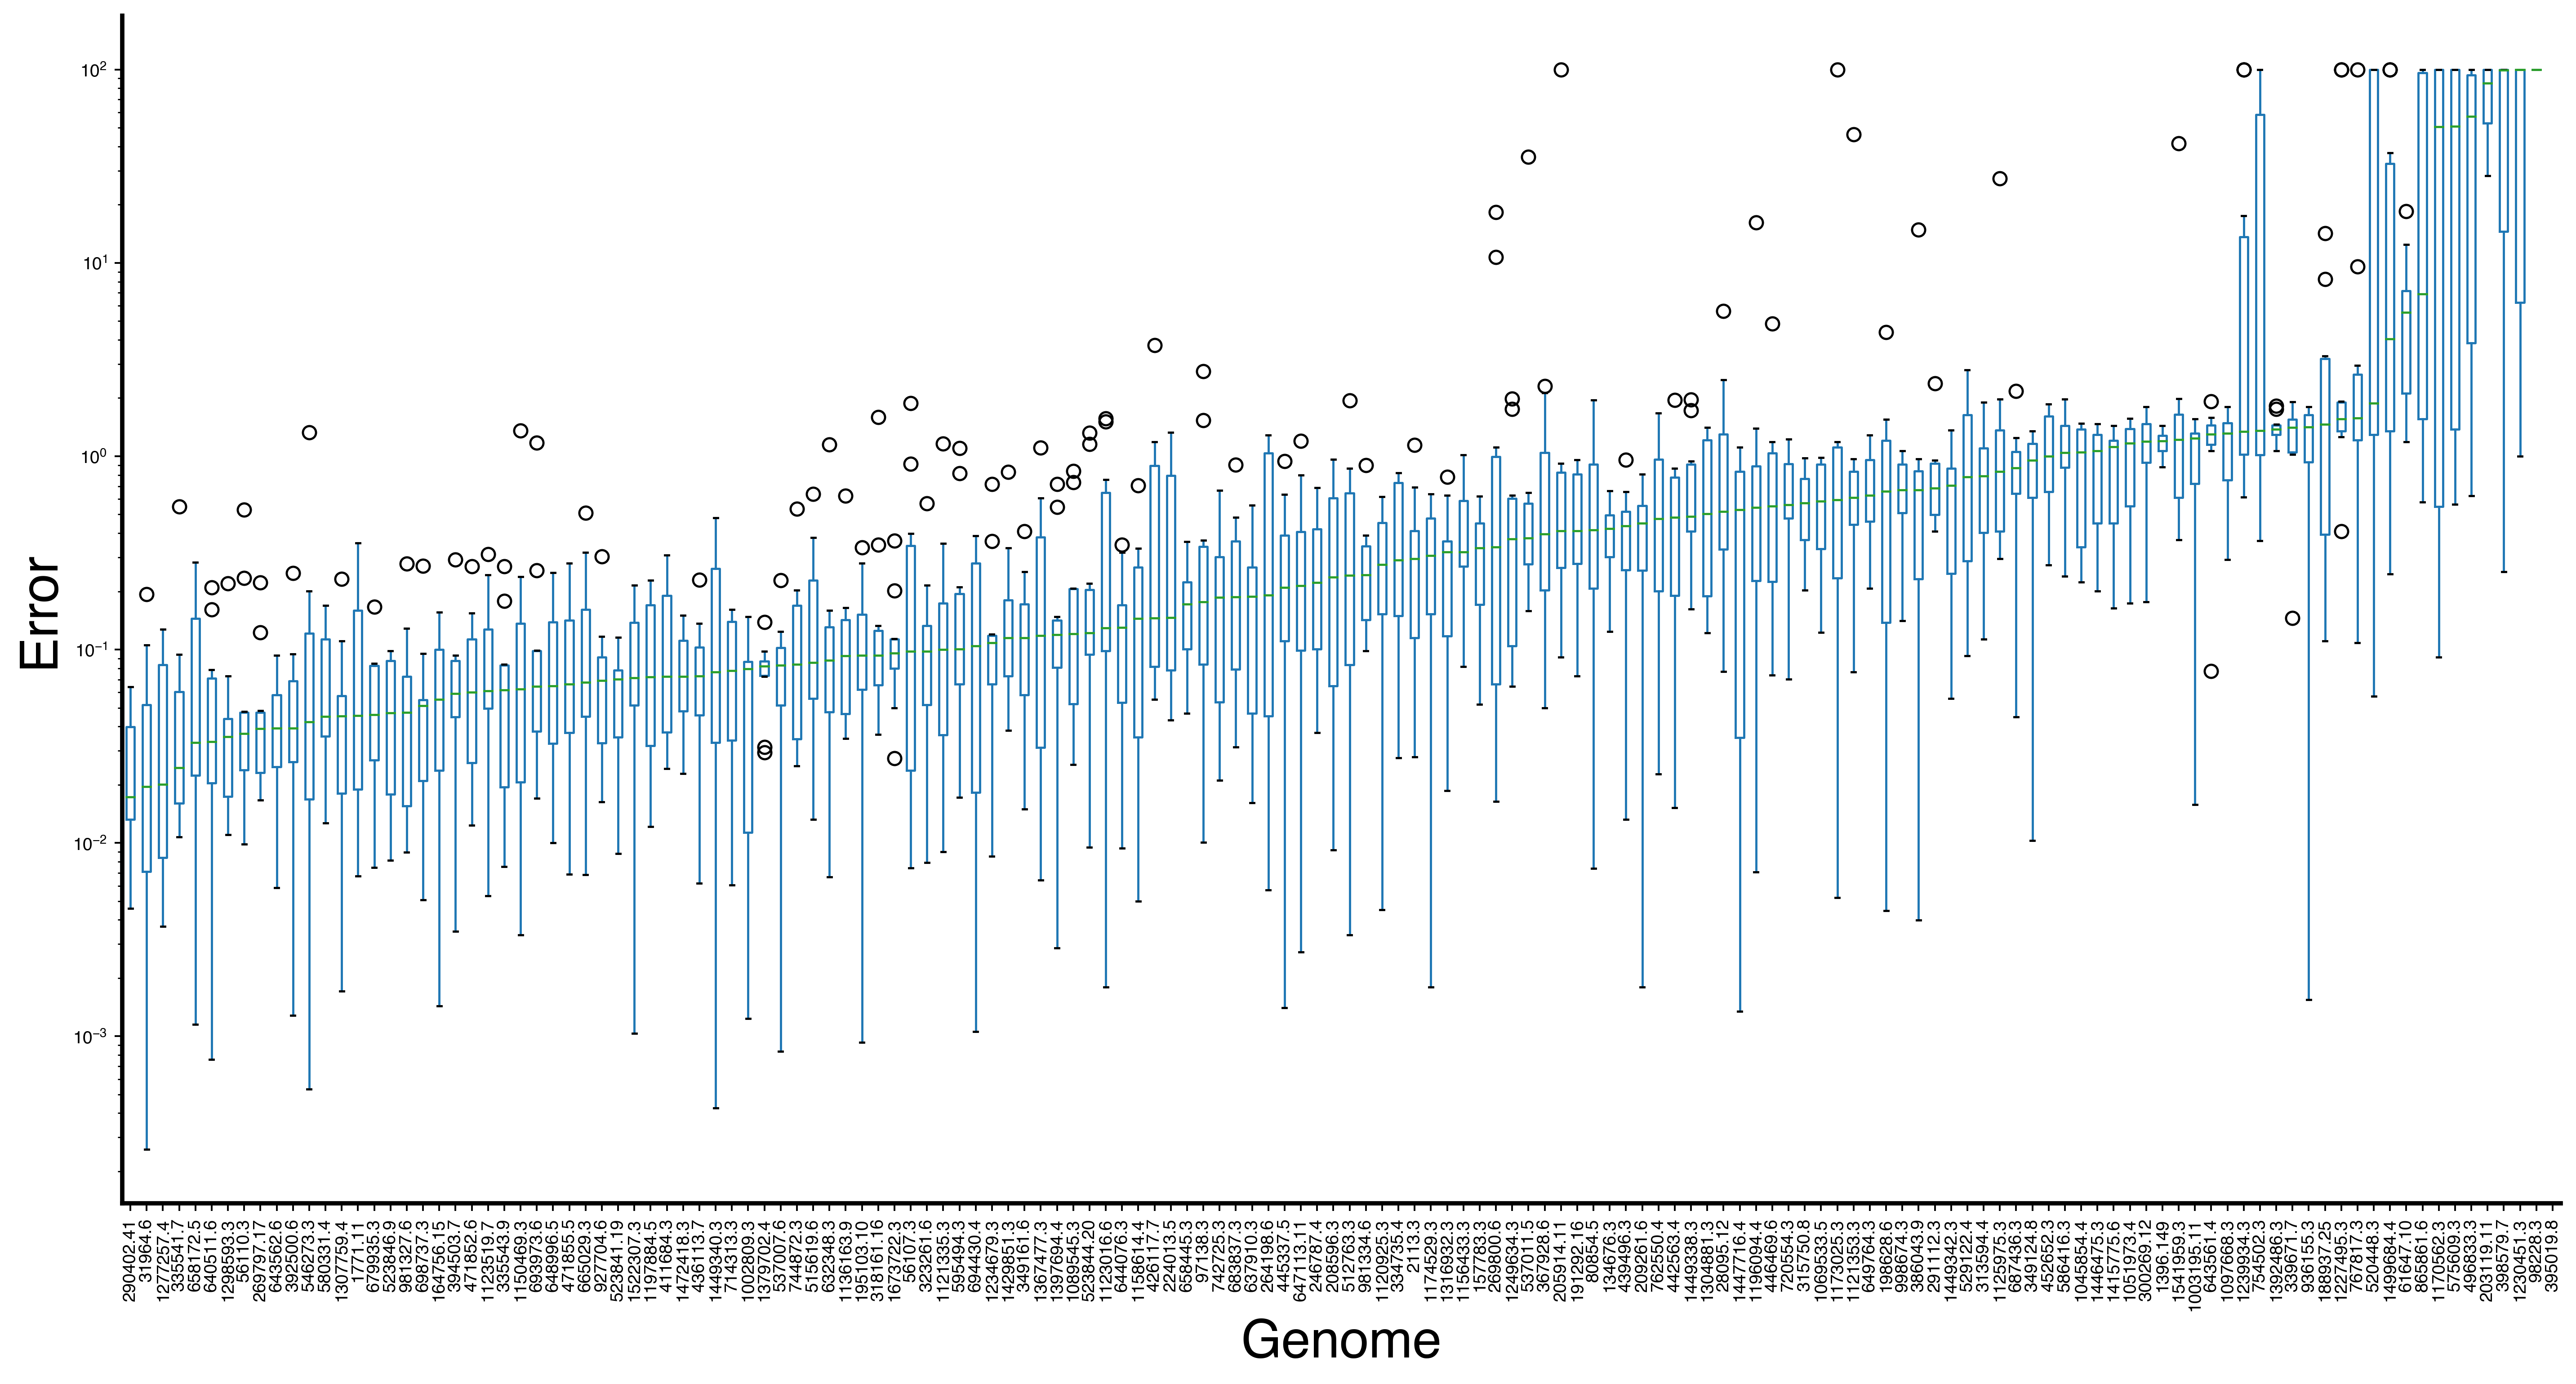

In [ ]:
# Show errors as boxplots

fig = plt.figure(figsize=(20,10))
to_plot = merged.reset_index()[["level_0", "error"]]
to_plot["error"] = np.clip(to_plot["error"], 0, 100)
grouped = to_plot.groupby("level_0")

# sort: inspired by https://stackoverflow.com/questions/21912634/how-can-i-sort-a-boxplot-in-pandas-by-the-median-values
df2 = pd.DataFrame({col:vals["error"] for col,vals in grouped})
meds = df2.median()
meds.sort_values(ascending=True, inplace=True)
df2 = df2[meds.index]
df2.boxplot(fontsize=8, rot=90, grid=False)

# clean up labels
ticks, labels = plt.xticks()
new_labels = [x._text.split(",")[0].lstrip("(") for x in labels]
plt.xticks(ticks, new_labels)
plt.yscale("log")
plt.xlabel("Genome")
plt.ylabel("Error")

plt.show()

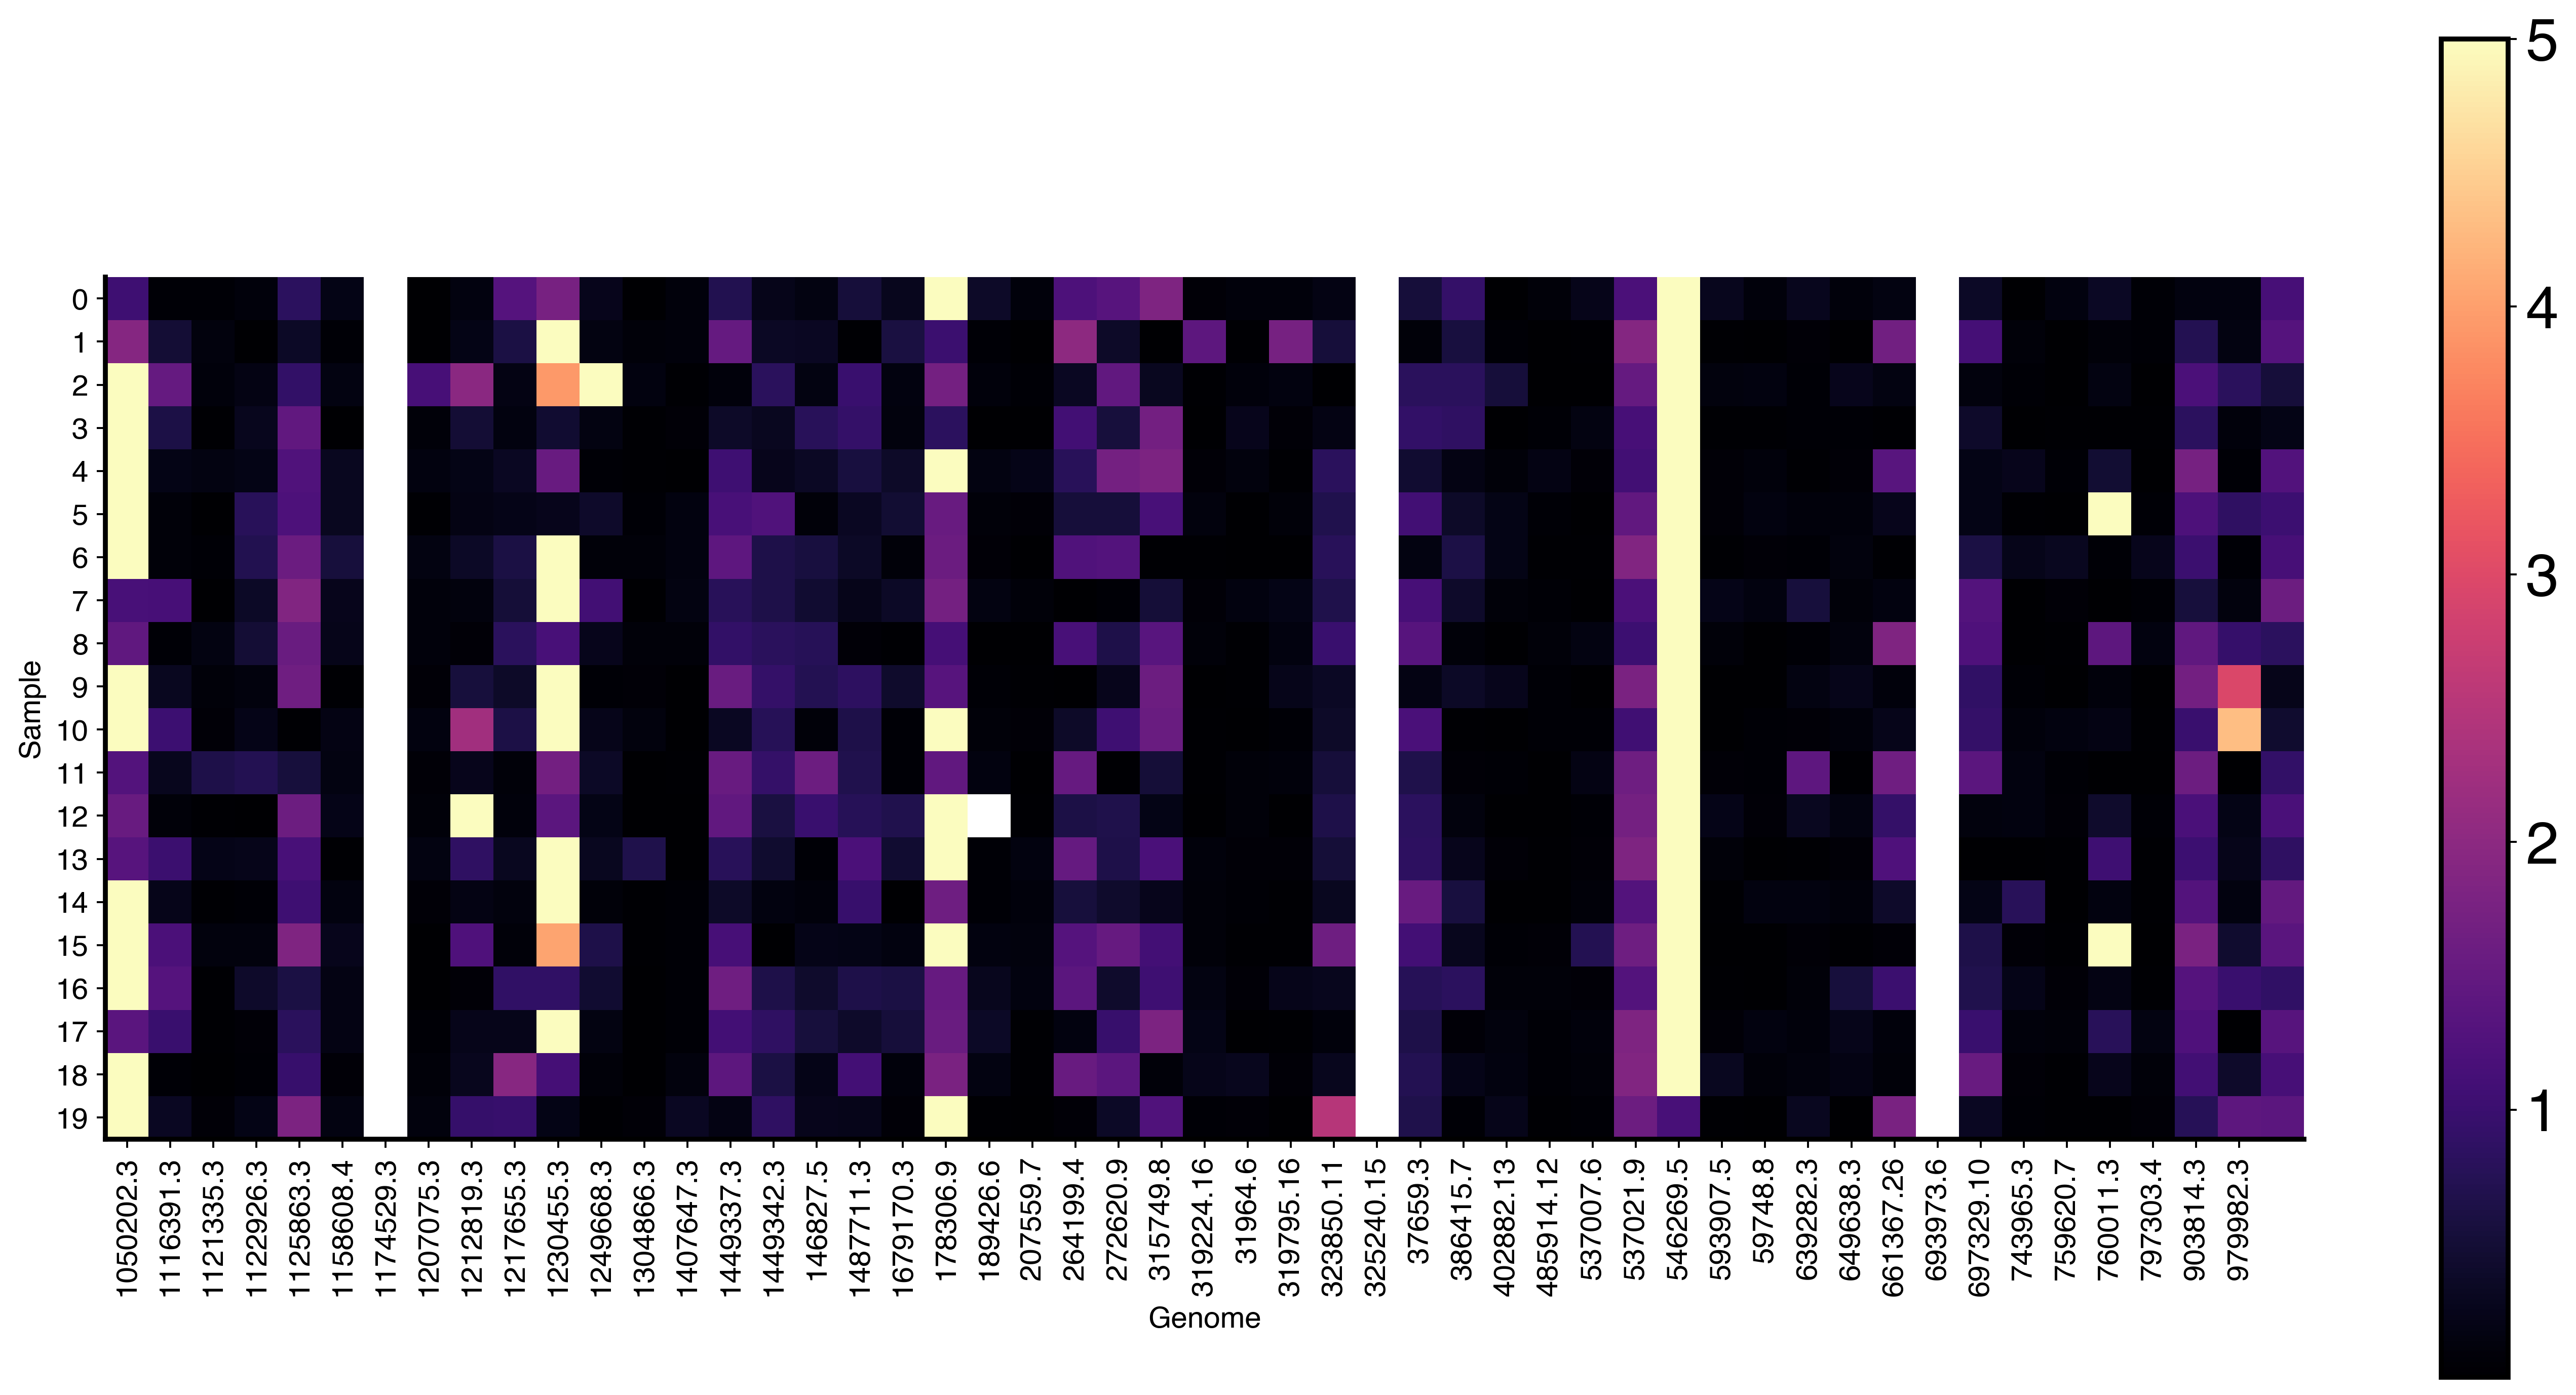

In [ ]:
fig = plt.figure(figsize=(20,10))
pivot = solution.pivot("genome", "sample", "err")
plt.imshow(pivot.transpose(), vmax=5)
plt.yticks(range(n_samples), range(n_samples), fontsize=12)
plt.xticks(range(n_genomes), pivot.index, fontsize=12, rotation=90)
plt.ylabel("Sample", fontsize=12)
plt.xlabel("Genome", fontsize=12)
plt.colorbar()

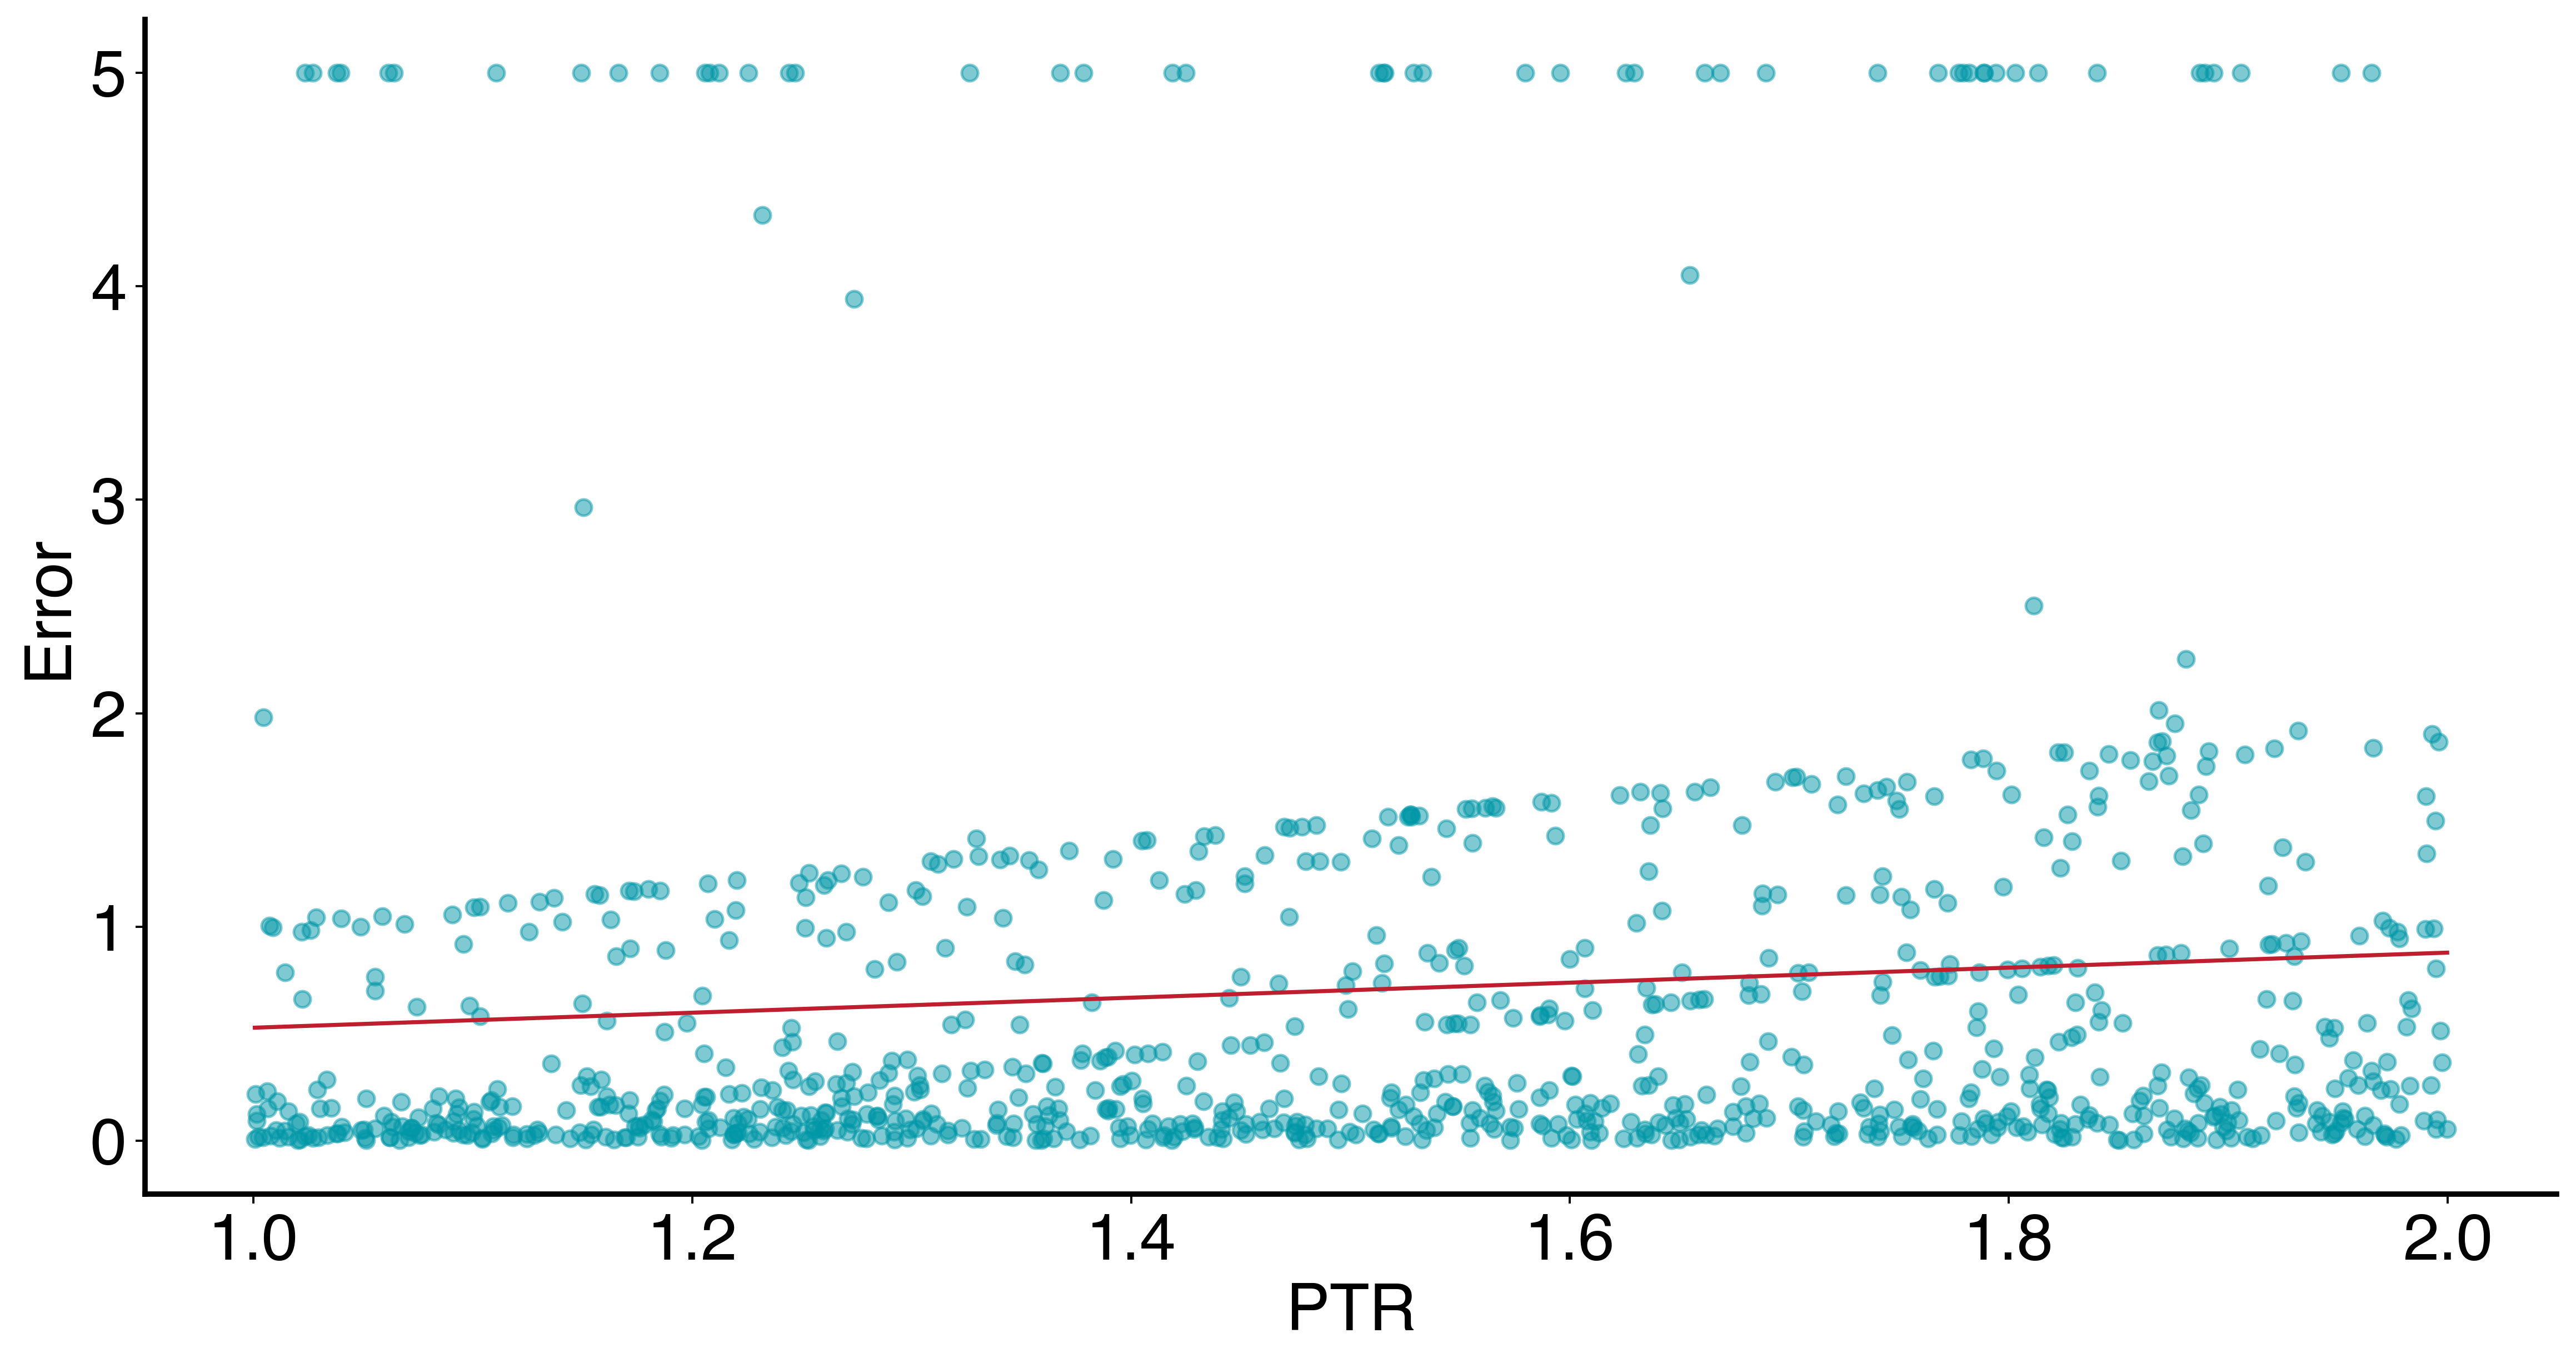

In [ ]:
x = merged.dropna()["ptr"]
y = np.clip(merged.dropna()["error"], 0, 5)
            
plt.scatter(x, y, c=blue, alpha=0.5)
plt.xlabel("PTR")
plt.ylabel("Error")

# best fit
par = np.polyfit(x, y, 1, full=True)
slope=par[0][0]
intercept=par[0][1]
xl = [min(x), max(x)]
yl = [slope*xx + intercept  for xx in xl]
plt.plot(xl, yl, c=red)

Text(0, 0.5, 'Error')

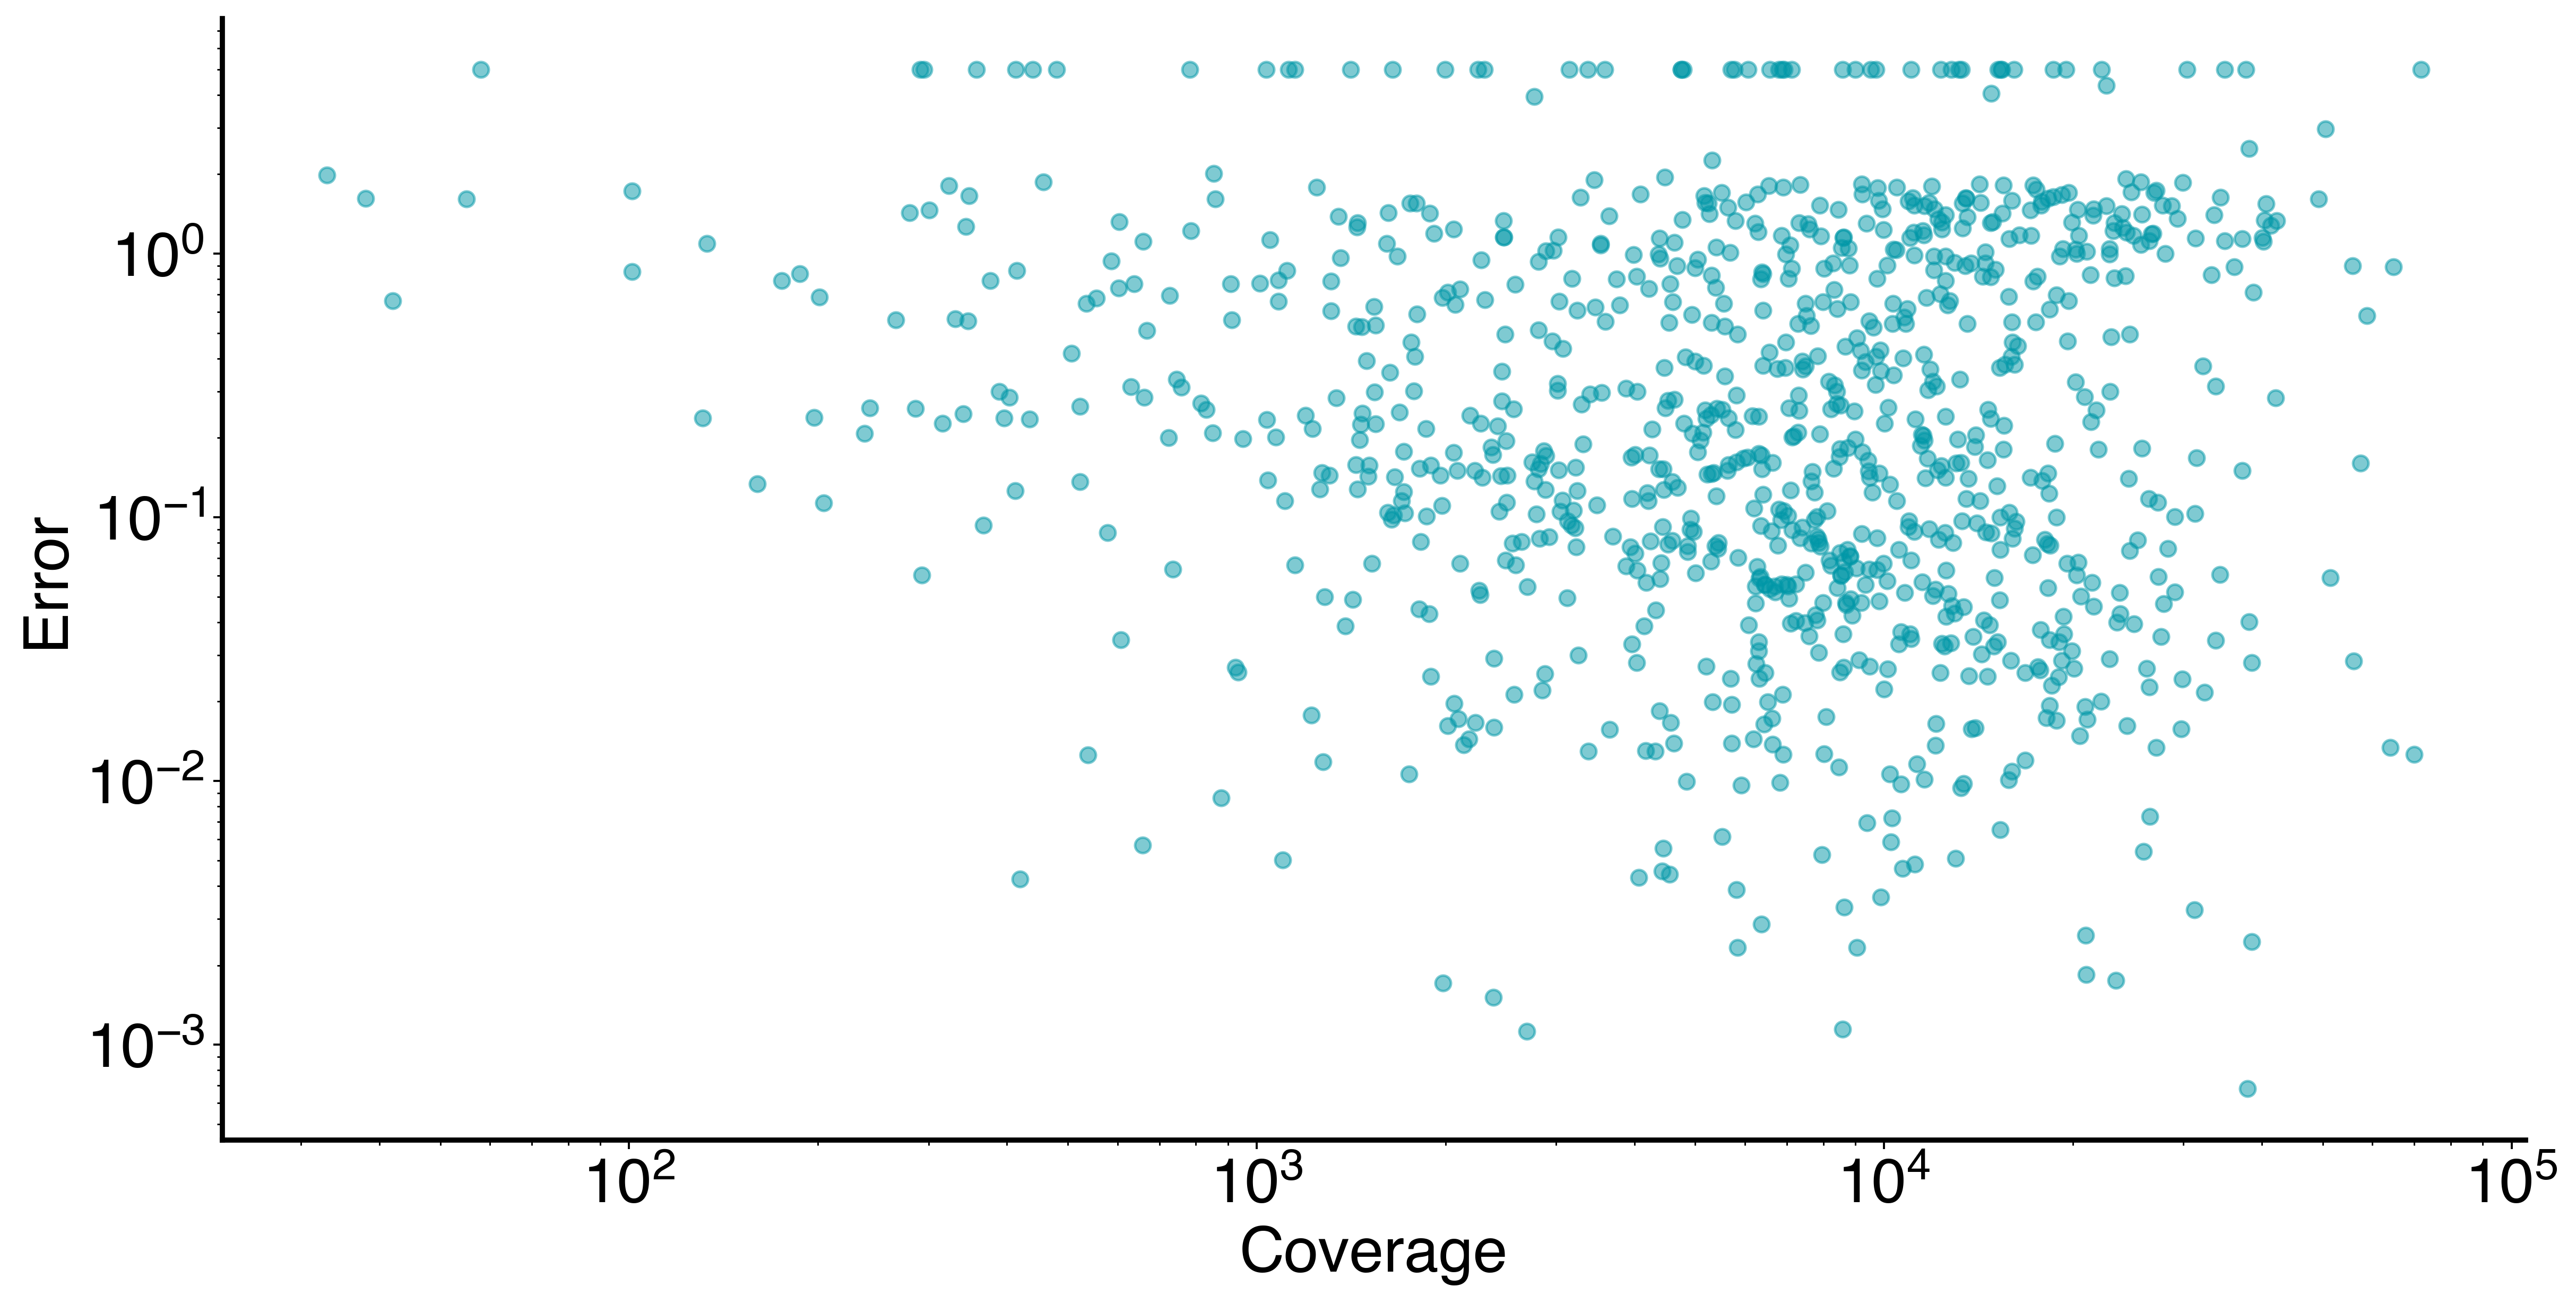

In [ ]:
x = merged.dropna()["coverage"]
y = np.clip(merged.dropna()["error"], 0, 5)
            
plt.scatter(x, y, c=blue, alpha=0.5)
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Coverage")
plt.ylabel("Error")

In [ ]:
# Sample from scale of ~.001 to ~100,000 
all_errors = pd.DataFrame(columns=["scale", "genome", "err"])
for i in range(6):
    scale = 10**i / 1e3
    print(f"Sampling at scale {scale}")
    matrix = generate_otu_matrix(db, ptrs, covs, scale=scale)
    solution = solve_matrix(db, matrix, ptrs)
    errors = solution[["genome", "err"]]
    errors["scale"] = scale
    all_errors = all_errors.append(errors)

Sampling at scale 0.001
Collision for 88bf6a04e19ff9ec0744066ea8156d01. Skipping this sequence...
Collision for 88bf6a04e19ff9ec0744066ea8156d01. Skipping this sequence...


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")
/content/aPTR/src/solver.py:255: RuntimeWarning: overflow encountered in exp2
  trough = np.exp2(m * 0.5 + b)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/content/aPTR/src/solver.py:256: RuntimeWarning: divide by zero encountered in double_scalars
  ptr = peak / trough


Collision for 88bf6a04e19ff9ec0744066ea8156d01. Skipping this sequence...
Collision for 88bf6a04e19ff9ec0744066ea8156d01. Skipping this sequence...
Collision for 88bf6a04e19ff9ec0744066ea8156d01. Skipping this sequence...
Collision for 88bf6a04e19ff9ec0744066ea8156d01. Skipping this sequence...
Collision for 88bf6a04e19ff9ec0744066ea8156d01. Skipping this sequence...
Collision for 88bf6a04e19ff9ec0744066ea8156d01. Skipping this sequence...
Collision for 88bf6a04e19ff9ec0744066ea8156d01. Skipping this sequence...
Collision for 88bf6a04e19ff9ec0744066ea8156d01. Skipping this sequence...
Collision for 88bf6a04e19ff9ec0744066ea8156d01. Skipping this sequence...
Collision for 88bf6a04e19ff9ec0744066ea8156d01. Skipping this sequence...
Collision for 88bf6a04e19ff9ec0744066ea8156d01. Skipping this sequence...
Collision for 88bf6a04e19ff9ec0744066ea8156d01. Skipping this sequence...
Collision for 88bf6a04e19ff9ec0744066ea8156d01. Skipping this sequence...


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


Sampling at scale 0.01
Collision for 88bf6a04e19ff9ec0744066ea8156d01. Skipping this sequence...
Collision for 88bf6a04e19ff9ec0744066ea8156d01. Skipping this sequence...
Collision for 88bf6a04e19ff9ec0744066ea8156d01. Skipping this sequence...
Collision for 88bf6a04e19ff9ec0744066ea8156d01. Skipping this sequence...
Collision for 88bf6a04e19ff9ec0744066ea8156d01. Skipping this sequence...
Collision for 88bf6a04e19ff9ec0744066ea8156d01. Skipping this sequence...
Collision for 88bf6a04e19ff9ec0744066ea8156d01. Skipping this sequence...
Collision for 88bf6a04e19ff9ec0744066ea8156d01. Skipping this sequence...
Collision for 88bf6a04e19ff9ec0744066ea8156d01. Skipping this sequence...
Collision for 88bf6a04e19ff9ec0744066ea8156d01. Skipping this sequence...
Collision for 88bf6a04e19ff9ec0744066ea8156d01. Skipping this sequence...
Collision for 88bf6a04e19ff9ec0744066ea8156d01. Skipping this sequence...
Collision for 88bf6a04e19ff9ec0744066ea8156d01. Skipping this sequence...
Collision for 8

/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


Collision for 88bf6a04e19ff9ec0744066ea8156d01. Skipping this sequence...
Collision for 88bf6a04e19ff9ec0744066ea8156d01. Skipping this sequence...
Collision for 88bf6a04e19ff9ec0744066ea8156d01. Skipping this sequence...
Collision for 88bf6a04e19ff9ec0744066ea8156d01. Skipping this sequence...
Collision for 88bf6a04e19ff9ec0744066ea8156d01. Skipping this sequence...
Collision for 88bf6a04e19ff9ec0744066ea8156d01. Skipping this sequence...
Collision for 88bf6a04e19ff9ec0744066ea8156d01. Skipping this sequence...
Collision for 88bf6a04e19ff9ec0744066ea8156d01. Skipping this sequence...
Collision for 88bf6a04e19ff9ec0744066ea8156d01. Skipping this sequence...
Collision for 88bf6a04e19ff9ec0744066ea8156d01. Skipping this sequence...
Collision for 88bf6a04e19ff9ec0744066ea8156d01. Skipping this sequence...
Collision for 88bf6a04e19ff9ec0744066ea8156d01. Skipping this sequence...
Collision for 88bf6a04e19ff9ec0744066ea8156d01. Skipping this sequence...
Collision for 88bf6a04e19ff9ec0744066e

/content/aPTR/src/solver.py:256: RuntimeWarning: overflow encountered in double_scalars
  ptr = peak / trough


Collision for 88bf6a04e19ff9ec0744066ea8156d01. Skipping this sequence...
Sampling at scale 100.0
Collision for 88bf6a04e19ff9ec0744066ea8156d01. Skipping this sequence...
Collision for 88bf6a04e19ff9ec0744066ea8156d01. Skipping this sequence...
Collision for 88bf6a04e19ff9ec0744066ea8156d01. Skipping this sequence...
Collision for 88bf6a04e19ff9ec0744066ea8156d01. Skipping this sequence...
Collision for 88bf6a04e19ff9ec0744066ea8156d01. Skipping this sequence...
Collision for 88bf6a04e19ff9ec0744066ea8156d01. Skipping this sequence...
Collision for 88bf6a04e19ff9ec0744066ea8156d01. Skipping this sequence...
Collision for 88bf6a04e19ff9ec0744066ea8156d01. Skipping this sequence...
Collision for 88bf6a04e19ff9ec0744066ea8156d01. Skipping this sequence...
Collision for 88bf6a04e19ff9ec0744066ea8156d01. Skipping this sequence...
Collision for 88bf6a04e19ff9ec0744066ea8156d01. Skipping this sequence...
Collision for 88bf6a04e19ff9ec0744066ea8156d01. Skipping this sequence...
Collision for 

/usr/local/lib/python3.7/dist-packages/numpy/ma/core.py:6849: RuntimeWarning: overflow encountered in power
  result = np.where(m, fa, umath.power(fa, fb)).view(basetype)


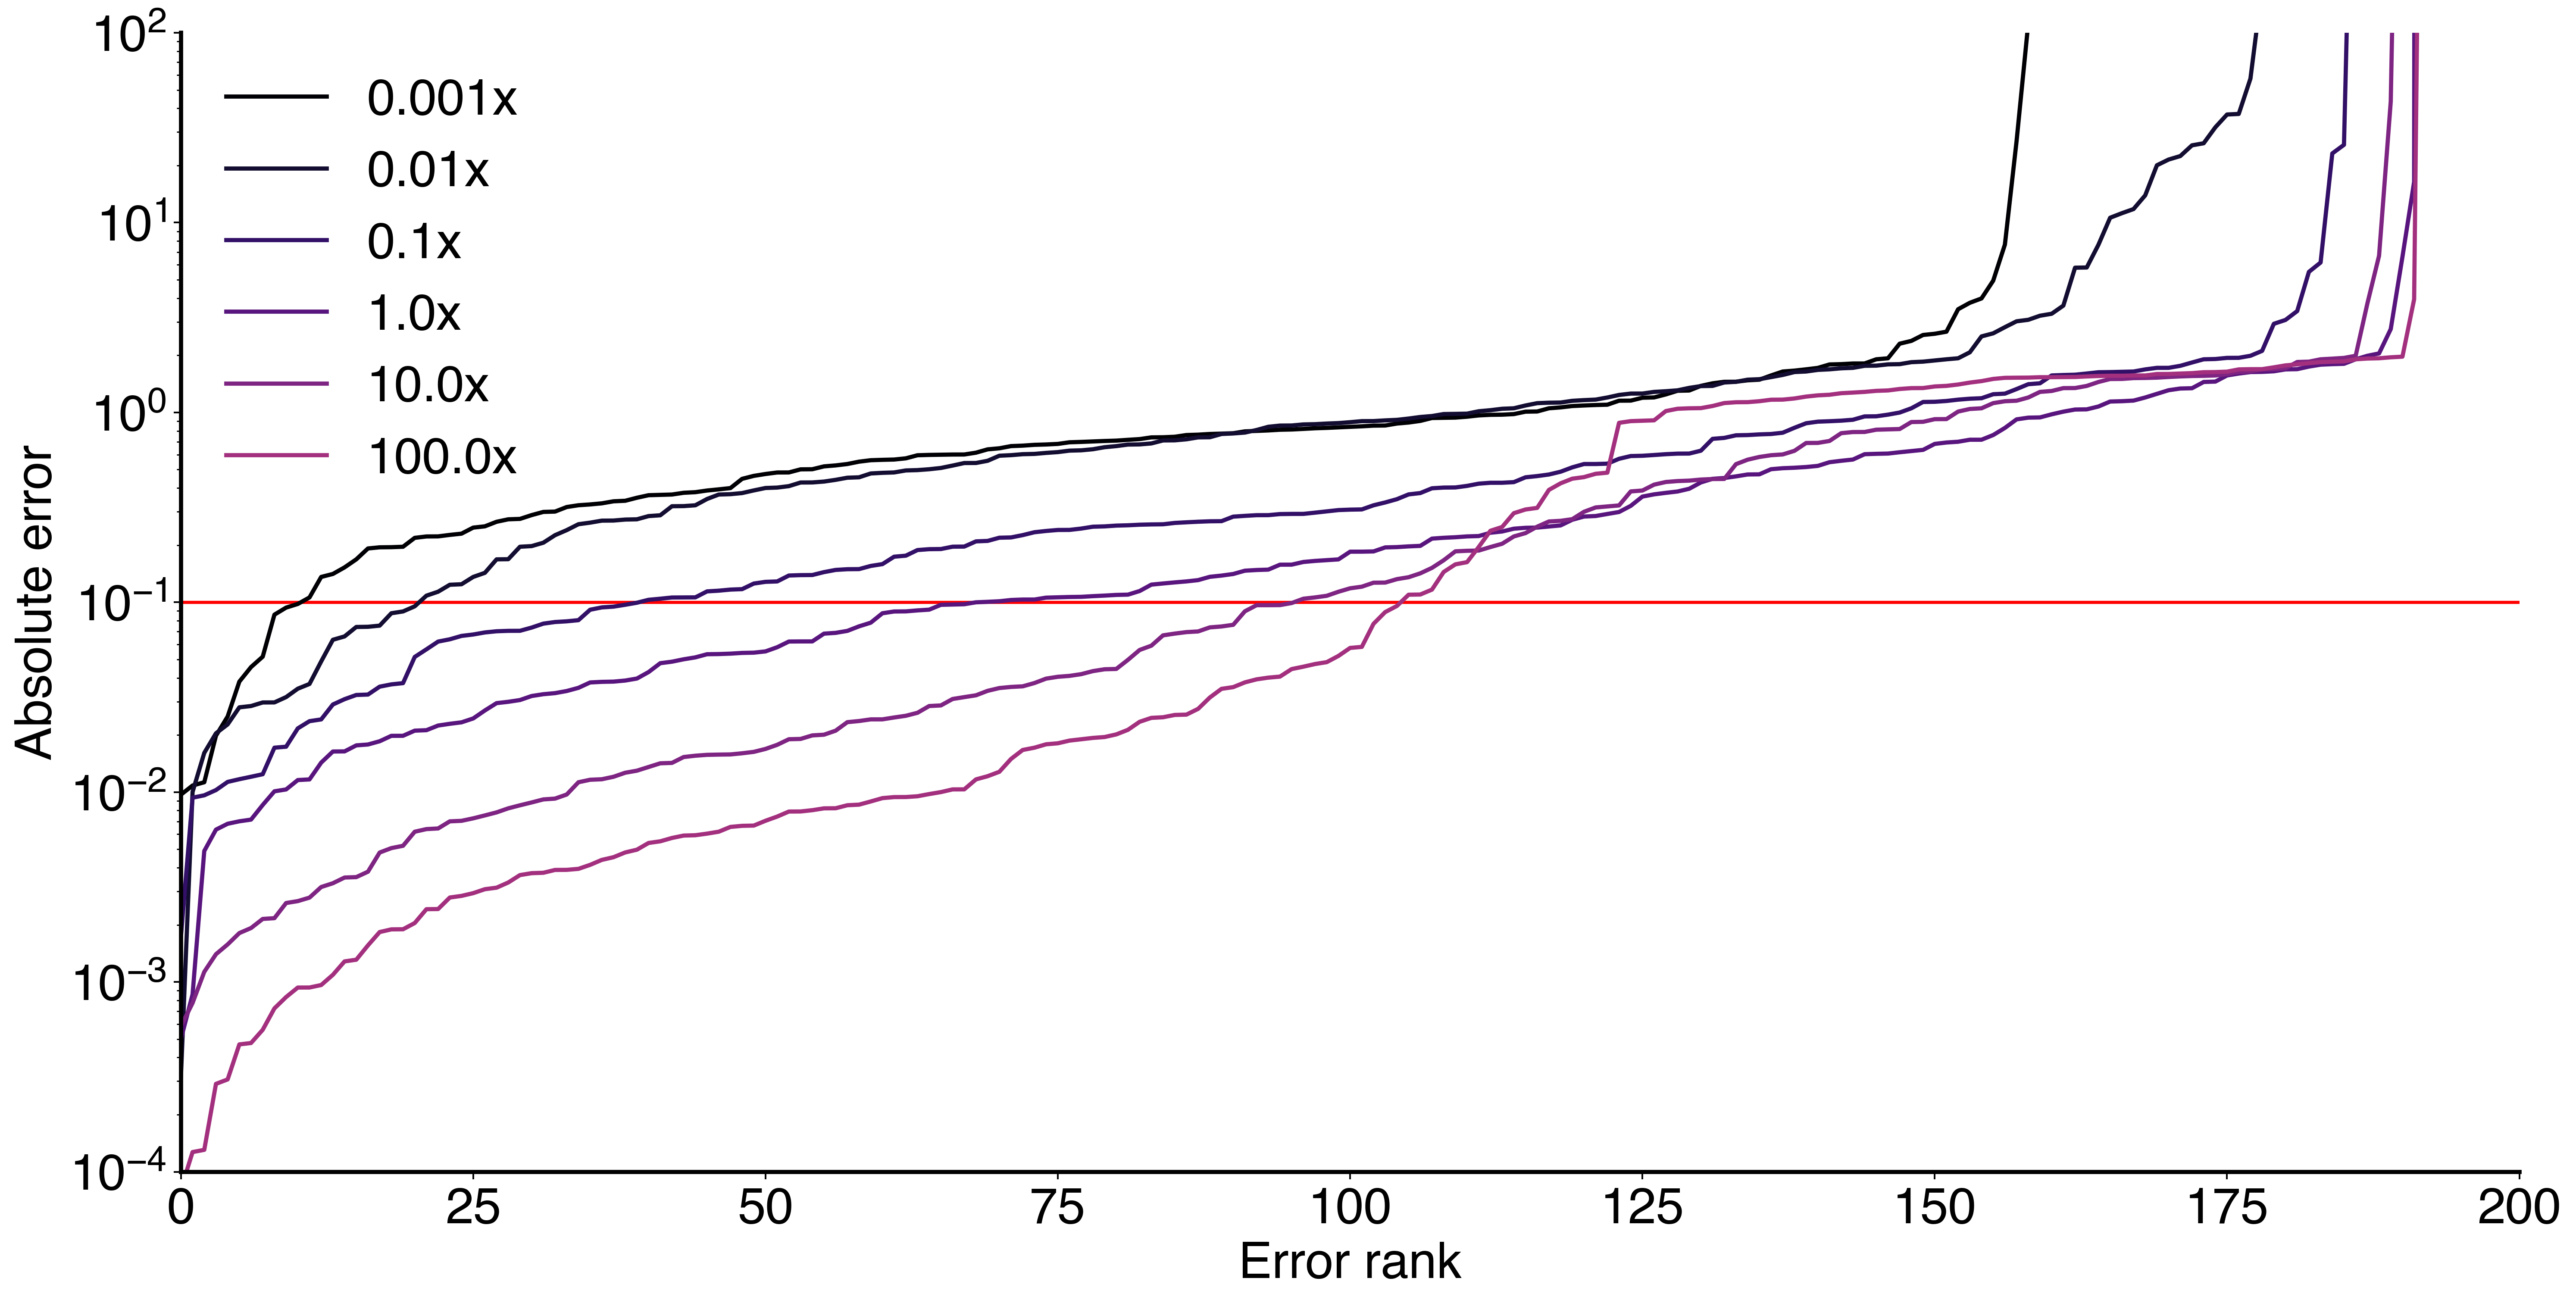

In [ ]:
fig = plt.figure(figsize=(20,10))

colors = mpl.cm.get_cmap('magma', 12)

for idx, scale in enumerate(all_errors["scale"].unique()):
    errs = all_errors[all_errors["scale"] == scale]
    sorted_errors = np.sort(errs["err"])
    sorted_errors[np.isinf(sorted_errors)] = 1e6 # prevent overflows
    plt.plot(sorted_errors, label=f"{scale}x", lw=2, color=colors.colors[idx])

plt.yscale("log")
plt.xlim(0, n_genomes * n_samples)
plt.ylim(1e-4, 100)
plt.ylabel("Absolute error")
plt.xlabel("Error rank")
plt.hlines(.1, -10, 1e3, colors='red')
plt.legend()

In [ ]:
all_errors

,scale,genome,err
0,0.001,935568.3,1.642808
1,0.001,60481.13,0.675053
2,0.001,452662.3,112.600613
3,0.001,644284.3,1.789569
4,0.001,262543.8,0.777014
...,...,...,...
195,100.000,665937.3,0.006663
196,100.000,262543.8,1.640300
197,100.000,867900.3,0.904311
198,100.000,634497.12,0.001090


<Figure size 7000x3500 with 0 Axes>

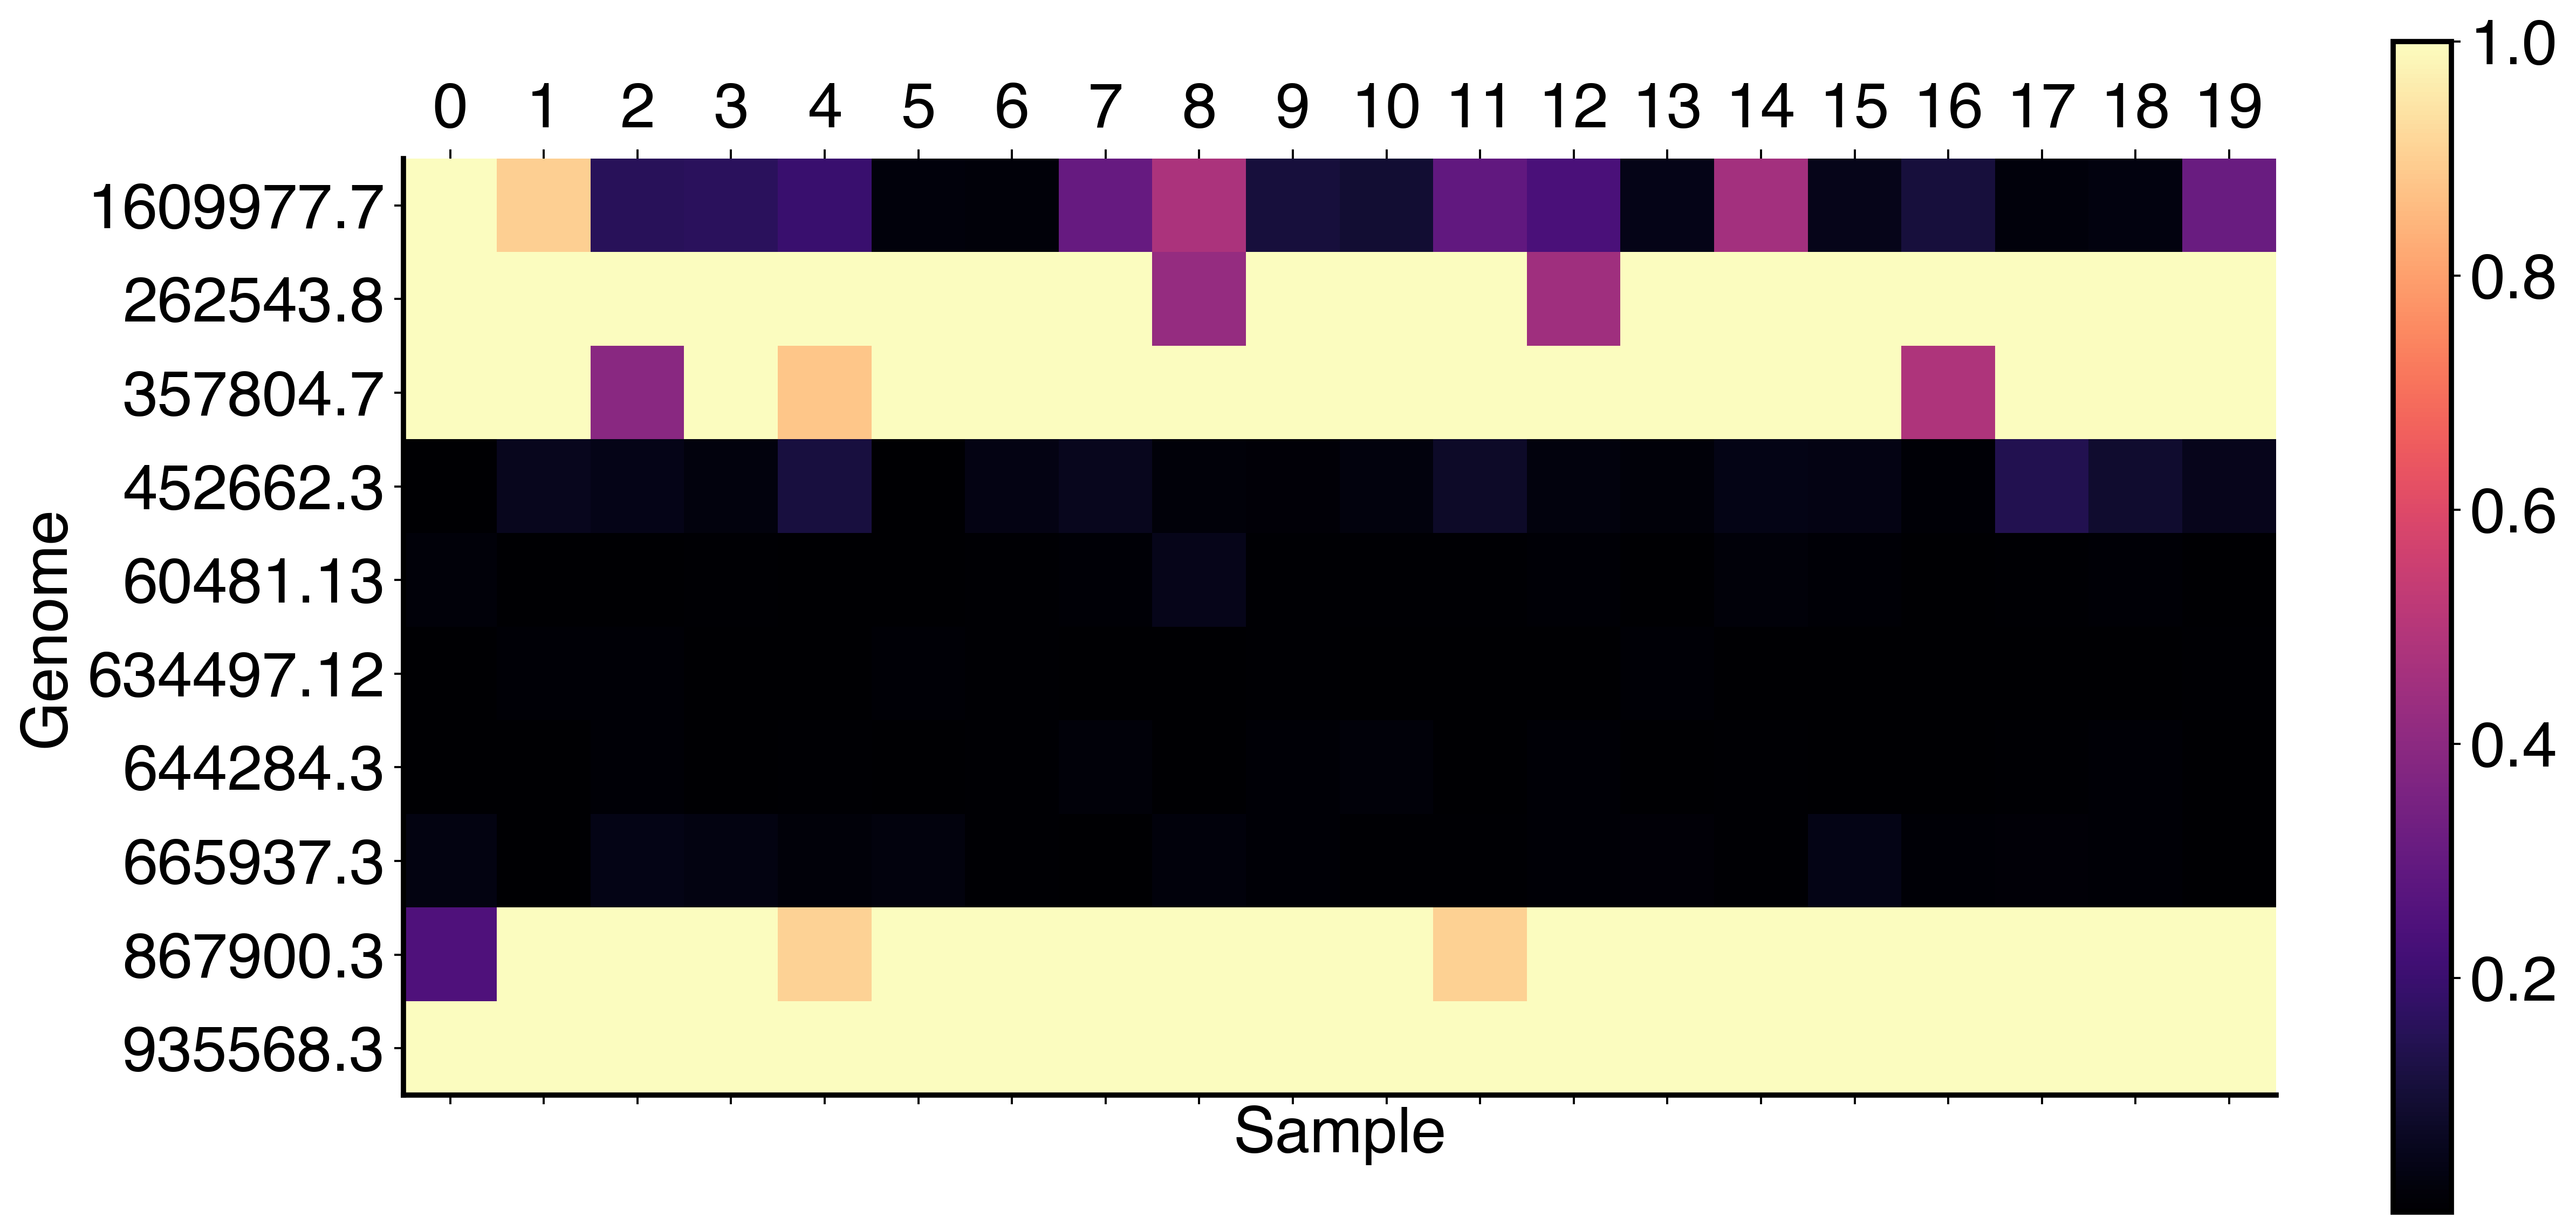

In [ ]:
fig = plt.figure(figsize=(20,10))
pivot = solution.pivot("genome", "sample", "err")
plt.matshow(pivot, vmax=1)
plt.xticks(range(n_samples), range(n_samples))
plt.yticks(range(n_genomes), pivot.index)
plt.xlabel("Sample")
plt.ylabel("Genome")
plt.colorbar()

In [ ]:
# Let's get average errors for ALL the genomes

all_solutions = pd.DataFrame()

non_colliding_genomes = set(db.genomes) - set(db.collisions["genome"].unique())
non_colliding_genomes = list(non_colliding_genomes)
print(len(non_colliding_genomes))

n_samples = 10
samples = [f"sample_{n}" for n in range(n_samples)]

for idx, genome in enumerate(non_colliding_genomes):
    print(idx)
    ptrs = pd.DataFrame(1 + np.random.rand(1, n_samples), index=[genome], columns=samples)
    covs = pd.DataFrame(np.random.exponential(size=(1, n_samples), scale=exp_scale).astype(int), index=[genome], columns=samples)

    try:
        matrix = generate_otu_matrix(db, ptrs, covs)
        solution = solve_matrix(db, matrix, ptrs)

        all_solutions = all_solutions.append(solution)
    except:
        print("Error here")

print("Done!")

1177
0
1


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


2


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


3


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


4


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


5


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


6


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


7


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


8


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


9


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


10


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


11


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


12
13


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


14


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


True PTR evaluation: Bypassing KeyError: '537021.9'
True PTR evaluation: Bypassing KeyError: '537021.9'
True PTR evaluation: Bypassing KeyError: '537021.9'
True PTR evaluation: Bypassing KeyError: '537021.9'
True PTR evaluation: Bypassing KeyError: '537021.9'
True PTR evaluation: Bypassing KeyError: '537021.9'
True PTR evaluation: Bypassing KeyError: '537021.9'
True PTR evaluation: Bypassing KeyError: '537021.9'
True PTR evaluation: Bypassing KeyError: '537021.9'
True PTR evaluation: Bypassing KeyError: '537021.9'
15


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


16


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


17


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


18


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


True PTR evaluation: Bypassing KeyError: '439496.3'
True PTR evaluation: Bypassing KeyError: '439496.3'
True PTR evaluation: Bypassing KeyError: '439496.3'
True PTR evaluation: Bypassing KeyError: '439496.3'
True PTR evaluation: Bypassing KeyError: '439496.3'
True PTR evaluation: Bypassing KeyError: '439496.3'
True PTR evaluation: Bypassing KeyError: '439496.3'
True PTR evaluation: Bypassing KeyError: '439496.3'
True PTR evaluation: Bypassing KeyError: '439496.3'
True PTR evaluation: Bypassing KeyError: '439496.3'
19


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


True PTR evaluation: Bypassing KeyError: '1120792.3'
True PTR evaluation: Bypassing KeyError: '1120792.3'
True PTR evaluation: Bypassing KeyError: '1120792.3'
True PTR evaluation: Bypassing KeyError: '1120792.3'
True PTR evaluation: Bypassing KeyError: '1120792.3'
True PTR evaluation: Bypassing KeyError: '1120792.3'
True PTR evaluation: Bypassing KeyError: '1120792.3'
True PTR evaluation: Bypassing KeyError: '1120792.3'
True PTR evaluation: Bypassing KeyError: '1120792.3'
True PTR evaluation: Bypassing KeyError: '1120792.3'
20


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


21


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


22


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


True PTR evaluation: Bypassing KeyError: '216895.17'
True PTR evaluation: Bypassing KeyError: '216895.17'
True PTR evaluation: Bypassing KeyError: '216895.17'
True PTR evaluation: Bypassing KeyError: '216895.17'
True PTR evaluation: Bypassing KeyError: '216895.17'
True PTR evaluation: Bypassing KeyError: '216895.17'
True PTR evaluation: Bypassing KeyError: '216895.17'
True PTR evaluation: Bypassing KeyError: '216895.17'
True PTR evaluation: Bypassing KeyError: '216895.17'
True PTR evaluation: Bypassing KeyError: '216895.17'
23


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


24


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The number of calls to function has reached maxfev = 2000.
  warnings.warn(msg, RuntimeWarning)


25


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


26


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


27


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The number of calls to function has reached maxfev = 1600.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


28


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


29
30


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


31
32
Collision for af9b5e6b54fb296cdbc097cde6c64208. Skipping this sequence...
Collision for af9b5e6b54fb296cdbc097cde6c64208. Skipping this sequence...
Collision for af9b5e6b54fb296cdbc097cde6c64208. Skipping this sequence...
Collision for af9b5e6b54fb296cdbc097cde6c64208. Skipping this sequence...
Collision for af9b5e6b54fb296cdbc097cde6c64208. Skipping this sequence...
Collision for af9b5e6b54fb296cdbc097cde6c64208. Skipping this sequence...
Collision for af9b5e6b54fb296cdbc097cde6c64208. Skipping this sequence...
Collision for af9b5e6b54fb296cdbc097cde6c64208. Skipping this sequence...


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


Collision for af9b5e6b54fb296cdbc097cde6c64208. Skipping this sequence...
Collision for af9b5e6b54fb296cdbc097cde6c64208. Skipping this sequence...
33


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")
/content/aPTR/src/solver.py:256: RuntimeWarning: divide by zero encountered in double_scalars
  ptr = peak / trough


34


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


35


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


36


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


37


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


38


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


39


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


40


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


41


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


42


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


43


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


44


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


45


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


46


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


47


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


48


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


49


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


50


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


51


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


52


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


53


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


54
55


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


56


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


True PTR evaluation: Bypassing KeyError: '1529886.3'
True PTR evaluation: Bypassing KeyError: '1529886.3'
True PTR evaluation: Bypassing KeyError: '1529886.3'
True PTR evaluation: Bypassing KeyError: '1529886.3'
True PTR evaluation: Bypassing KeyError: '1529886.3'
True PTR evaluation: Bypassing KeyError: '1529886.3'
True PTR evaluation: Bypassing KeyError: '1529886.3'
True PTR evaluation: Bypassing KeyError: '1529886.3'
True PTR evaluation: Bypassing KeyError: '1529886.3'
True PTR evaluation: Bypassing KeyError: '1529886.3'
57
Collision for 04d2fa01855d0b38d42c823c7efcbc68. Skipping this sequence...
Collision for a664b6bfcd47f41c2dfe6ee15905300e. Skipping this sequence...
Collision for 04d2fa01855d0b38d42c823c7efcbc68. Skipping this sequence...
Collision for a664b6bfcd47f41c2dfe6ee15905300e. Skipping this sequence...
Collision for 04d2fa01855d0b38d42c823c7efcbc68. Skipping this sequence...
Collision for a664b6bfcd47f41c2dfe6ee15905300e. Skipping this sequence...
Collision for 04d2fa018

/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


58


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


59


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


60


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


61


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


62


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


63


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


64
65


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


66


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


67


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


68


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


69


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


70


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


71


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


72


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


73


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


74


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


75


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


76


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


77


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


78


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


79


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


80


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


81


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The number of calls to function has reached maxfev = 1600.
  warnings.warn(msg, RuntimeWarning)


82


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


83


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


84
85


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


86


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The number of calls to function has reached maxfev = 2000.
  warnings.warn(msg, RuntimeWarning)


87


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


88


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


89


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


90


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


91


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


92


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


93


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


94


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


95


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


96


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


97


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


98


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


True PTR evaluation: Bypassing KeyError: '1174529.3'
True PTR evaluation: Bypassing KeyError: '1174529.3'
True PTR evaluation: Bypassing KeyError: '1174529.3'
True PTR evaluation: Bypassing KeyError: '1174529.3'
True PTR evaluation: Bypassing KeyError: '1174529.3'
True PTR evaluation: Bypassing KeyError: '1174529.3'
True PTR evaluation: Bypassing KeyError: '1174529.3'
True PTR evaluation: Bypassing KeyError: '1174529.3'
True PTR evaluation: Bypassing KeyError: '1174529.3'
True PTR evaluation: Bypassing KeyError: '1174529.3'
99


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


100


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


101


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


True PTR evaluation: Bypassing KeyError: '1149862.3'
True PTR evaluation: Bypassing KeyError: '1149862.3'
True PTR evaluation: Bypassing KeyError: '1149862.3'
True PTR evaluation: Bypassing KeyError: '1149862.3'
True PTR evaluation: Bypassing KeyError: '1149862.3'
True PTR evaluation: Bypassing KeyError: '1149862.3'
True PTR evaluation: Bypassing KeyError: '1149862.3'
True PTR evaluation: Bypassing KeyError: '1149862.3'
True PTR evaluation: Bypassing KeyError: '1149862.3'
True PTR evaluation: Bypassing KeyError: '1149862.3'
102


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


103


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


104
105


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The number of calls to function has reached maxfev = 2400.
  warnings.warn(msg, RuntimeWarning)


106


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


107


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


108


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


109


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


110


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


111


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


112


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


113
Collision for 5ebaf7223f3a4ec560bcaeba7244db6d. Skipping this sequence...
Collision for 5ebaf7223f3a4ec560bcaeba7244db6d. Skipping this sequence...
Collision for 5ebaf7223f3a4ec560bcaeba7244db6d. Skipping this sequence...
Collision for 5ebaf7223f3a4ec560bcaeba7244db6d. Skipping this sequence...
Collision for 5ebaf7223f3a4ec560bcaeba7244db6d. Skipping this sequence...
Collision for 5ebaf7223f3a4ec560bcaeba7244db6d. Skipping this sequence...
Collision for 5ebaf7223f3a4ec560bcaeba7244db6d. Skipping this sequence...
Collision for 5ebaf7223f3a4ec560bcaeba7244db6d. Skipping this sequence...
Collision for 5ebaf7223f3a4ec560bcaeba7244db6d. Skipping this sequence...
Collision for 5ebaf7223f3a4ec560bcaeba7244db6d. Skipping this sequence...
114


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)
/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


115
116
Collision for 87ba98e7bec4a2c28ce17580c9661836. Skipping this sequence...
Collision for ea1af3e1ea859a6ea81bcc162dcc325c. Skipping this sequence...
Collision for 87ba98e7bec4a2c28ce17580c9661836. Skipping this sequence...
Collision for ea1af3e1ea859a6ea81bcc162dcc325c. Skipping this sequence...
Collision for 87ba98e7bec4a2c28ce17580c9661836. Skipping this sequence...
Collision for ea1af3e1ea859a6ea81bcc162dcc325c. Skipping this sequence...
Collision for 87ba98e7bec4a2c28ce17580c9661836. Skipping this sequence...
Collision for ea1af3e1ea859a6ea81bcc162dcc325c. Skipping this sequence...
Collision for 87ba98e7bec4a2c28ce17580c9661836. Skipping this sequence...
Collision for ea1af3e1ea859a6ea81bcc162dcc325c. Skipping this sequence...
Collision for 87ba98e7bec4a2c28ce17580c9661836. Skipping this sequence...
Collision for ea1af3e1ea859a6ea81bcc162dcc325c. Skipping this sequence...
Collision for 87ba98e7bec4a2c28ce17580c9661836. Skipping this sequence...
Collision for ea1af3e1ea859a6e

/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")
/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


118


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


119


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


120


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


121


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


122


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


123


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


124


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


125


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


126


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


127


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


128


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


129


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


130


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


131


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


132


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The number of calls to function has reached maxfev = 1600.
  warnings.warn(msg, RuntimeWarning)


133


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


134


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


135


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


True PTR evaluation: Bypassing KeyError: '402882.13'
True PTR evaluation: Bypassing KeyError: '402882.13'
True PTR evaluation: Bypassing KeyError: '402882.13'
True PTR evaluation: Bypassing KeyError: '402882.13'
True PTR evaluation: Bypassing KeyError: '402882.13'
True PTR evaluation: Bypassing KeyError: '402882.13'
True PTR evaluation: Bypassing KeyError: '402882.13'
True PTR evaluation: Bypassing KeyError: '402882.13'
True PTR evaluation: Bypassing KeyError: '402882.13'
True PTR evaluation: Bypassing KeyError: '402882.13'
136


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


137


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


138


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


139


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


140


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


141


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")
/content/aPTR/src/solver.py:255: RuntimeWarning: overflow encountered in exp2
  trough = np.exp2(m * 0.5 + b)
/content/aPTR/src/solver.py:256: RuntimeWarning: divide by zero encountered in double_scalars
  ptr = peak / trough


142


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


143


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


144
145


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


146


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


147


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


148


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


True PTR evaluation: Bypassing KeyError: '592022.4'
True PTR evaluation: Bypassing KeyError: '1348623.7'
True PTR evaluation: Bypassing KeyError: '592022.4'
True PTR evaluation: Bypassing KeyError: '1348623.7'
True PTR evaluation: Bypassing KeyError: '592022.4'
True PTR evaluation: Bypassing KeyError: '1348623.7'
True PTR evaluation: Bypassing KeyError: '592022.4'
True PTR evaluation: Bypassing KeyError: '1348623.7'


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


True PTR evaluation: Bypassing KeyError: '592022.4'
True PTR evaluation: Bypassing KeyError: '1348623.7'
True PTR evaluation: Bypassing KeyError: '592022.4'
True PTR evaluation: Bypassing KeyError: '1348623.7'
True PTR evaluation: Bypassing KeyError: '592022.4'
True PTR evaluation: Bypassing KeyError: '1348623.7'
True PTR evaluation: Bypassing KeyError: '592022.4'
True PTR evaluation: Bypassing KeyError: '1348623.7'
True PTR evaluation: Bypassing KeyError: '592022.4'
True PTR evaluation: Bypassing KeyError: '1348623.7'
True PTR evaluation: Bypassing KeyError: '592022.4'
True PTR evaluation: Bypassing KeyError: '1348623.7'


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


149
150


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


151


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


152


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


153


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


154


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


155


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


156


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


157


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The number of calls to function has reached maxfev = 1600.
  warnings.warn(msg, RuntimeWarning)


158


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


159


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")
/content/aPTR/src/solver.py:255: RuntimeWarning: overflow encountered in exp2
  trough = np.exp2(m * 0.5 + b)
/content/aPTR/src/solver.py:256: RuntimeWarning: divide by zero encountered in double_scalars
  ptr = peak / trough


160


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


161


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


162


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


163


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


164


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


165


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


166


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


167


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


168


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


169


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


170


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


True PTR evaluation: Bypassing KeyError: '59374.8'
True PTR evaluation: Bypassing KeyError: '59374.8'
True PTR evaluation: Bypassing KeyError: '59374.8'
True PTR evaluation: Bypassing KeyError: '59374.8'
True PTR evaluation: Bypassing KeyError: '59374.8'
True PTR evaluation: Bypassing KeyError: '59374.8'
True PTR evaluation: Bypassing KeyError: '59374.8'
True PTR evaluation: Bypassing KeyError: '59374.8'
True PTR evaluation: Bypassing KeyError: '59374.8'
True PTR evaluation: Bypassing KeyError: '59374.8'
171


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


172
173


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The number of calls to function has reached maxfev = 3200.
  warnings.warn(msg, RuntimeWarning)


174


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


175


/content/aPTR/src/solver.py:63: UserWarning: All RNAs map uniquely to a coverage. Computation is trivial
  warnings.warn("All RNAs map uniquely to a coverage. Computation is trivial")


176
